In [13]:
import pandas as pd
df = pd.read_csv("US_Stock_Data.csv")

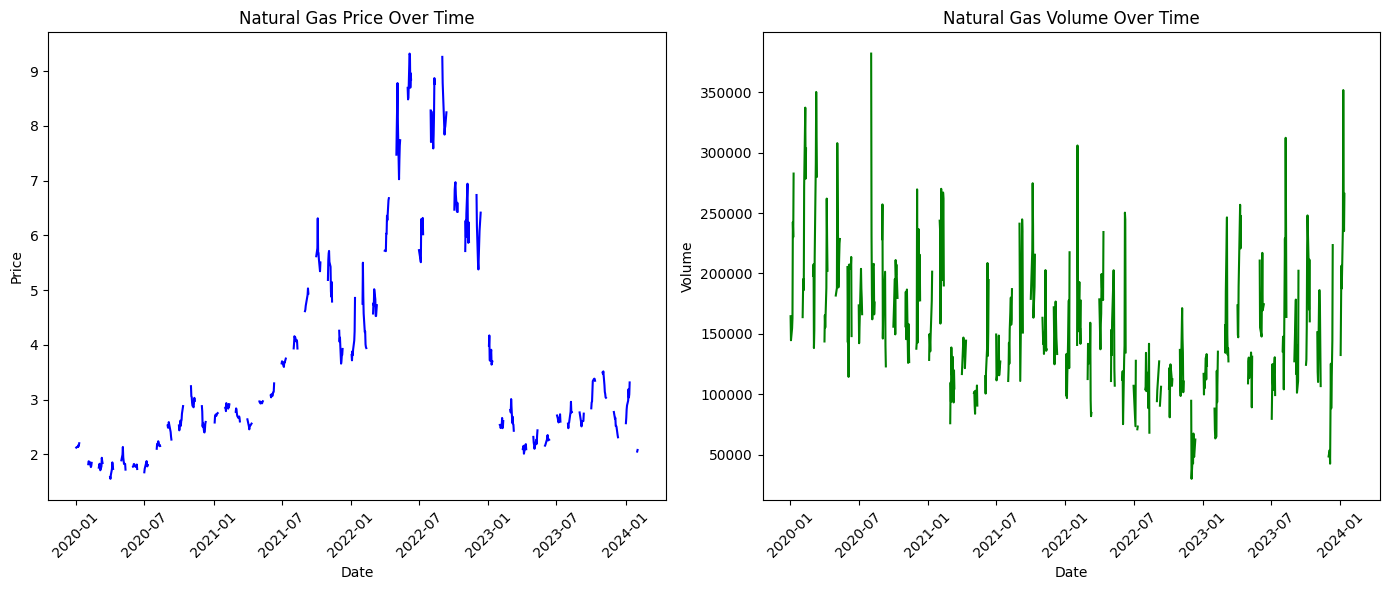

In [14]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df and the 'Date' column has already been converted to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Natural Gas Price on the first subplot
ax[0].plot(df.index, df['Natural_Gas_Price'], label='Natural Gas Price', color='blue')
ax[0].set_title('Natural Gas Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', rotation=45)

# Plot Natural Gas Volume on the second subplot
ax[1].plot(df.index, df['Natural_Gas_Vol.'], label='Natural Gas Volume', color='green')
ax[1].set_title('Natural Gas Volume Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


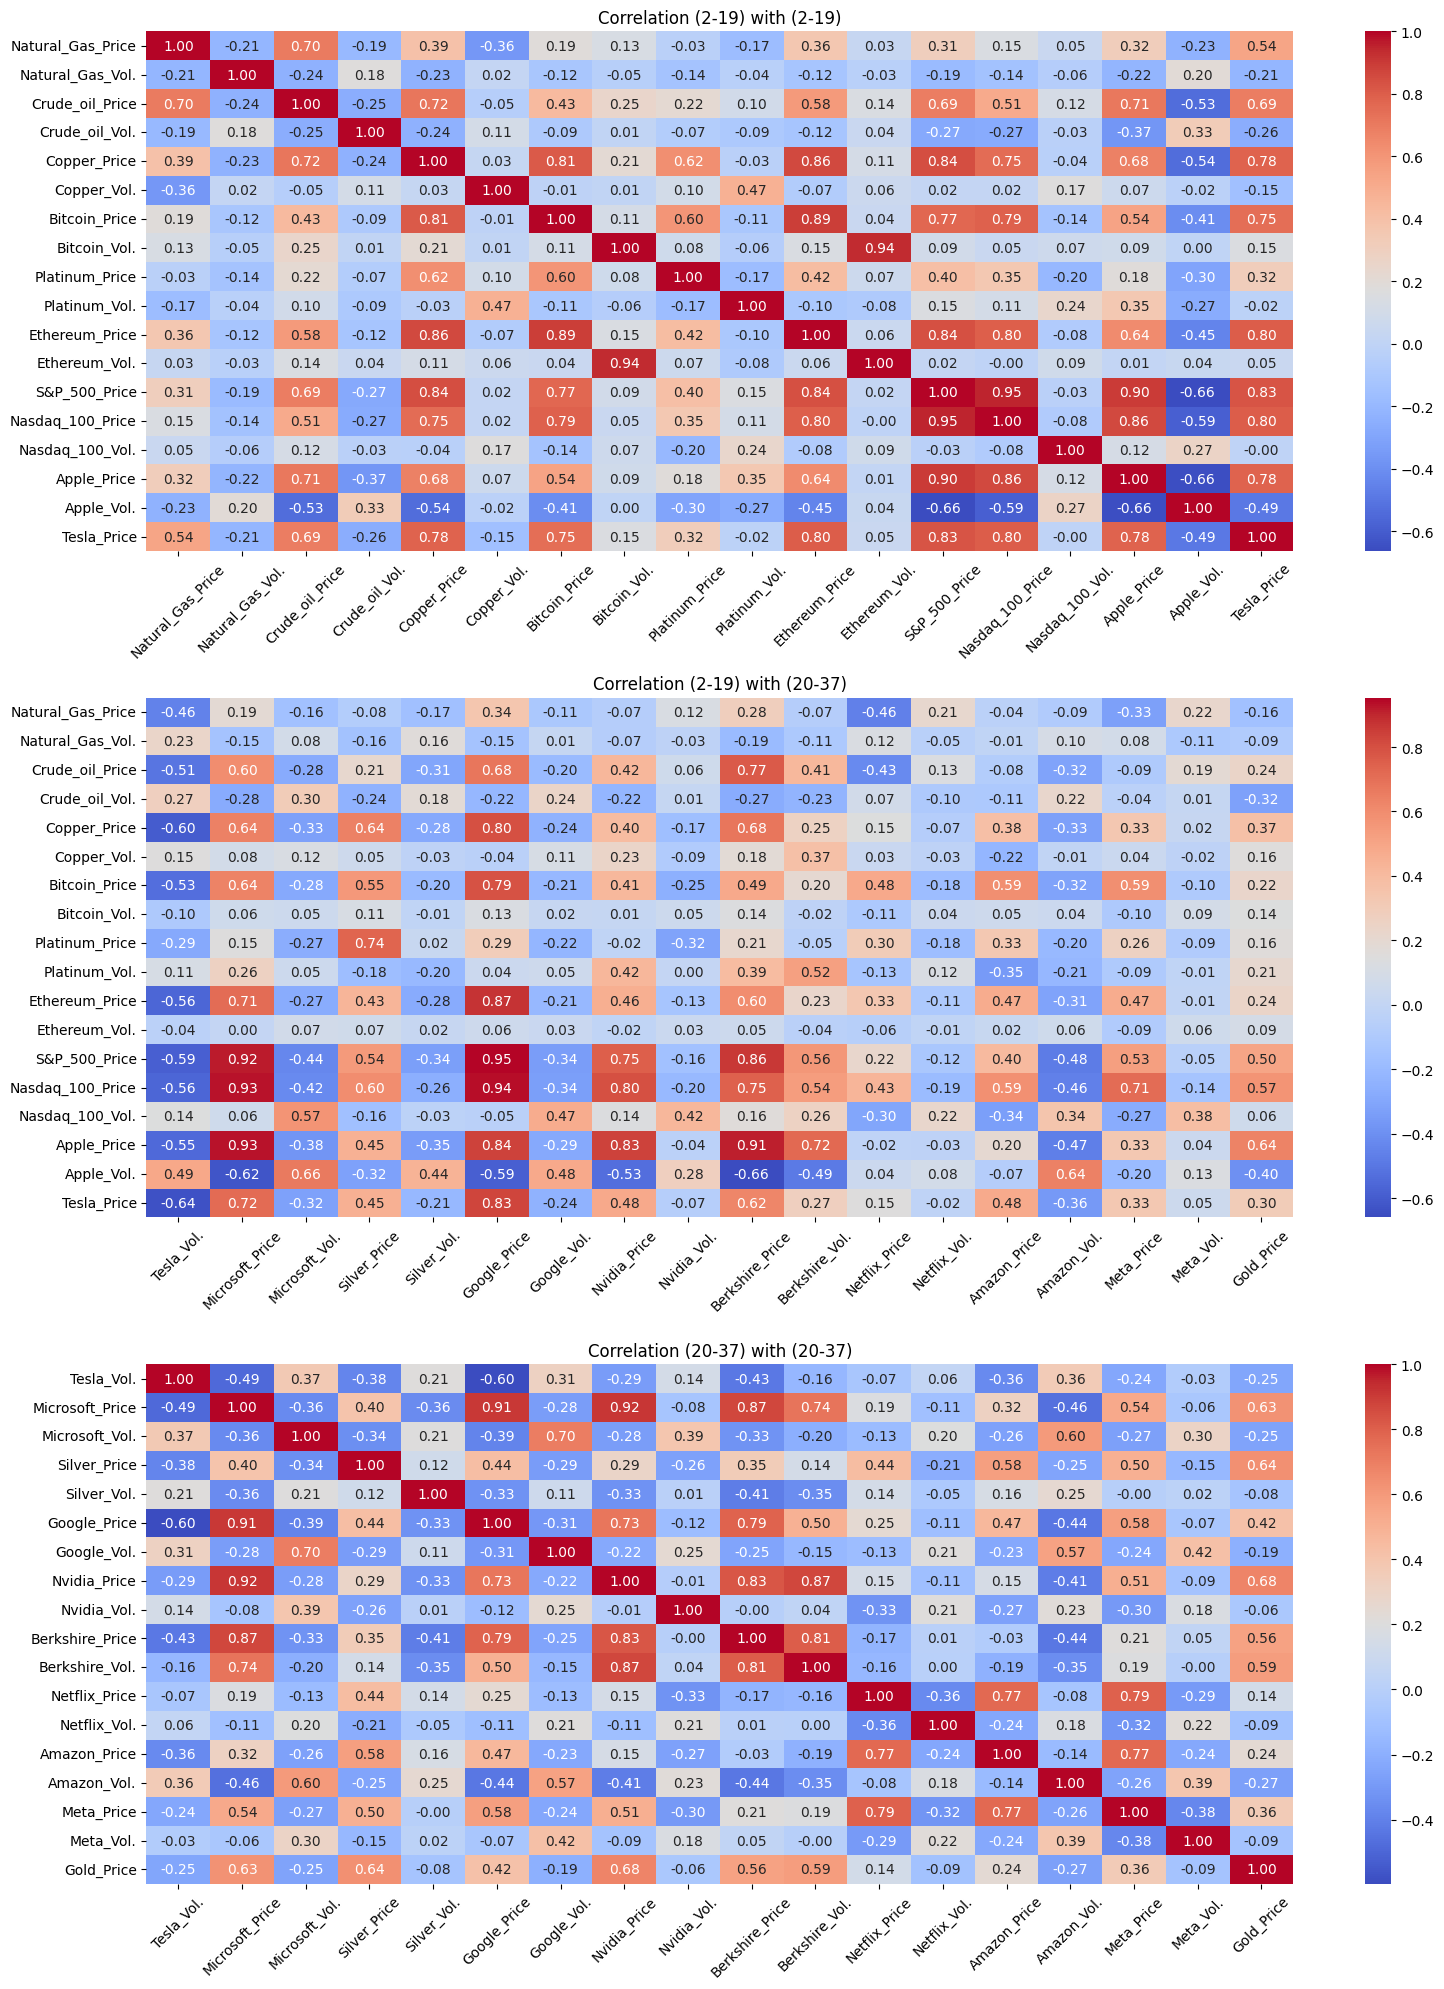

In [38]:
import seaborn as sns

# Remove commas and convert columns to numeric
df_clean = df.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Define column indices
cols_2_to_19 = df_clean.columns[1:19]  # Columns 2 to 19 (index 1 to 18)
cols_20_to_37 = df_clean.columns[19:37]  # Columns 20 to 37 (index 19 to 36)

# Compute the correlation matrices
corr_2_19_2_19 = df_clean[cols_2_to_19].corr()
corr_2_19_20_37 = pd.concat([df_clean[cols_2_to_19], df_clean[cols_20_to_37]], axis=1).corr().iloc[:len(cols_2_to_19), len(cols_2_to_19):]
corr_20_37_20_37 = df_clean[cols_20_to_37].corr()

# Create a 3x1 grid of heatmaps
fig, axs = plt.subplots(3, 1, figsize=(16, 20))

# Plot the heatmaps
sns.heatmap(corr_2_19_2_19, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('Correlation (2-19) with (2-19)')
plt.xticks(rotation=45)

sns.heatmap(corr_2_19_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1])
axs[1].set_title('Correlation (2-19) with (20-37)')
plt.xticks(rotation=45)

sns.heatmap(corr_20_37_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[2])
axs[2].set_title('Correlation (20-37) with (20-37)')
plt.xticks(rotation=45)

# Rotate x tick labels
for ax in axs:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()